# Hyperparameter Tuning

Parameter selection is a very critical step in machine learning model fitting. In our experiment, we apply the random forest model to map Planet SCA, and there are several important parameters used in the model training process. To get an optimal set of these parameters as well as the sample size, we conducted a sensitivity test of the following four parameters on the overall model accuracy, including the number of samples, number of features, number of trees, and tree depth. 
Specifically, we will use the ‘RandomForestClassifier’ function from [sklearn.ensemble](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier) to define the random forest model. The main parameters to customize the model include ‘n_estimators’, ‘max_depth’, and ‘max_features’.

* `n_estimators` is the number of trees in the forest. Normally, a larger tree number would result in a better model performance, but it also means a longer model training time. Additionally, the model performance will stop getting significantly better beyond a critical number of trees. 

* `max_features` is the size of feature subsets used in splitting a node. A good empirical value of max_features is ‘None’ for regression problems, which considers all features instead of a random subset, and ‘sqrt’ for classification tasks, which uses a random subset of size sqrt(n_features).

* `max_depth` is the maximum depth of the tree. A deeper tree has more splits and capture more information about the data. Similar to the number of trees, the model performance will stop getting significantly better once tree depth is deep enough.



First, we read the sample data using the code below. To reduce the calculation time, we select 10,000 samples instead of the entire 100,000 sample as the model performance does not show significant improvement when the sample size reaches around 4000 (section 4.1). We use k-fold cross-validation (k = 10) to evaluate model performance with 100 repeat times.

In [5]:
# prepare data 
import pandas as pd

data = pd.read_csv('./data/samples/sample_10K.csv', index_col = False)
print("Sample dimentions:".format(), data.shape)
data.head()
X = data[['blue','green','red','nir']]
y = data['label']

Sample dimentions: (10000, 5)


#### 4.1. Number of samples
Theoretically, the performance of random forest models can continually improve as the sample size increases. However, training a model with a large sample size would result in a high computational expense, and oftentimes, the model accuracy does not change significantly beyond a critical number of samples. 

We generated a custom function ‘get_model_size()’ to train random forest models with different sample size. We proportionately selected samples by changing ‘max_samples’ parameter. The “max_samples” argument can be set to a float between 0 and 1 to control the percentage of the training dataset to make the bootstrap sample used in each decision tree training. All custom functions are organized in the ‘functions_SCA_mapping.py’ and available to download in the GitHub repository for your interests.

To reduce the calculation time, we only show the percentages ranging from 0.01 to 0.1 with a 0.01 interval, and the percentages ranging from 0.1 to 1.0 with a 0.1 interval in the experiment below. The result shows that the overall model accuracy improves with the increasing sample size when the percentage increases from 0.01 to 0.08 (i.e., 100 to 800 samples), followed by a very slight improvement with the percentage increases from 0.08 to 0.4 (i.e., 800 to 4 k samples). The model performance changes negligibaly after the sample size reaches 4000 (i.e., 0.4 percentage), meaning that the whole dataset can be very well represented by a subset with 4000 observations. Therefore, we will use 4000 as the optimal sample size to train the SCA model.


>Sample size: 100   Mean Score: 0.997141 (Score SD: 0.001645)
>Sample size: 200   Mean Score: 0.997604 (Score SD: 0.001463)
>Sample size: 300   Mean Score: 0.997760 (Score SD: 0.001426)
>Sample size: 400   Mean Score: 0.997912 (Score SD: 0.001367)
>Sample size: 500   Mean Score: 0.998080 (Score SD: 0.001354)
>Sample size: 600   Mean Score: 0.998214 (Score SD: 0.001289)
>Sample size: 700   Mean Score: 0.998319 (Score SD: 0.001272)
>Sample size: 800   Mean Score: 0.998419 (Score SD: 0.001240)
>Sample size: 900   Mean Score: 0.998453 (Score SD: 0.001197)
>Sample size: 1000   Mean Score: 0.998486 (Score SD: 0.001178)
>Sample size: 2000   Mean Score: 0.998532 (Score SD: 0.001167)
>Sample size: 3000   Mean Score: 0.998618 (Score SD: 0.001154)
>Sample size: 4000   Mean Score: 0.998701 (Score SD: 0.001126)
>Sample size: 5000   Mean Score: 0.998731 (Score SD: 0.001118)
>Sample size: 6000   Mean Score: 0.998719 (Score SD: 0.001135)
>Sample size: 7000   Mean Score: 0.998716 (Score SD: 0.001123)
>

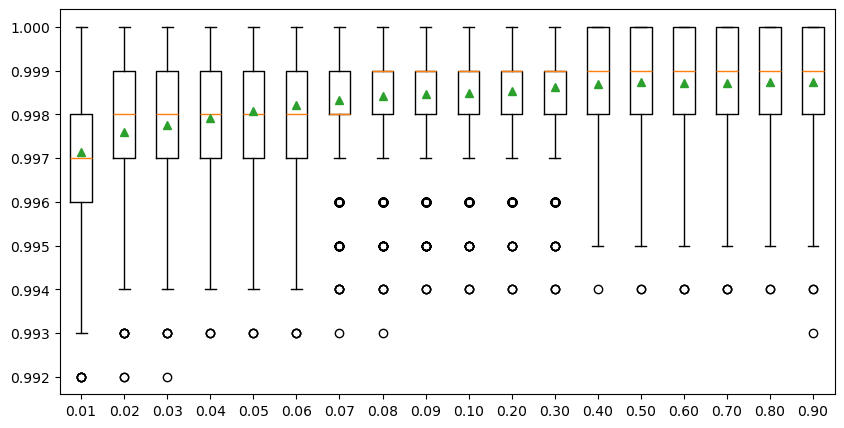

In [6]:
from functions_book_chapter_SCA import *

# customize models with different sample sizes
models = get_models_size()
results, names = list(), list()
for name, model in models.items():
    # evaluate models using k-fold cross-validation
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    # print the mean and standard deviation of models 
    print('>%s   Mean Score: %.6f (Score SD: %.6f)' % ('Sample size: ' + str(int(float(name) * 10000)), scores.mean(), scores.std()))
    
# display model performance 
plt.figure(figsize=(10,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

#### 4.2 Number of features 
The number of features for each split node is perhaps the most important feature to configure in our random forest model, and it is set via the ‘max_features’ parameter. To explore the influence of feature numbers on model accuracy, we tested model accuracy with the ‘max_features’ ranging from 1 to 4. The result shows that the median accuracy (green triangle) of the experiments with max_features = 4 is slightly higher than the other three max_features values, though no significant difference is observed among all four test sets.
The default of max_features is the square root of the number of input features. This would be sqrt(4) or two features for our test dataset. However, the total feature size we have is already very small and the model shows slightly better performance when max_features = 4. Also, we do not want to lose any information from these four bands. Therefore, we decided to use the max_features = 4 in the SCA model training.


>Features: 1   Mean Score: 0.998769 (Score SD: 0.001105)
>Features: 2   Mean Score: 0.998754 (Score SD: 0.001119)
>Features: 3   Mean Score: 0.998793 (Score SD: 0.001102)
>Features: 4   Mean Score: 0.998832 (Score SD: 0.001110)


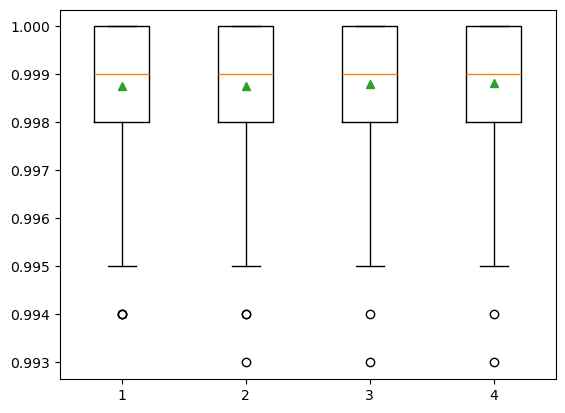

In [7]:
# customize models with different model feature sizes
models = get_models_feature()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate models using k-fold cross-validation
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    # print the mean and standard deviation of models 
    # print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    print('>%s   Mean Score: %.6f (Score SD: %.6f)' % ('Features: ' + name, scores.mean(), scores.std()))
# display model performance 
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

#### 4.3 Number of trees 
The number of trees is another key parameter to configure in a random forest model. The number of trees can be set via the “n_estimators'' and the default value is 100. The example below explores the effect of the number of trees on model performance. We set the ‘n_estimators’ to the values between 1 to 1,000, with only a few selected tree numbers displayed in the boxplot. Typically, when we increase the number of trees, the model performance increases but it will stabilize when we have enough trees. In this case, the change in model performance is negligible when the number of trees reaches 10, and thus we will use n_estimators = 10 in our SCA model.


In [8]:
# customize models with different tree numbers
models = get_models_tree()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate models using k-fold cross-validation
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    # print the mean and standard deviation of models 
    # print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    print('>%s   Mean Score: %.6f (Score SD: %.6f)' % ('Tree numbers: ' + name, scores.mean(), scores.std()))
# display model performance 
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>Tree numbers: 1   Mean Score: 0.998265 (Score SD: 0.001342)
>Tree numbers: 2   Mean Score: 0.998451 (Score SD: 0.001211)
>Tree numbers: 3   Mean Score: 0.998651 (Score SD: 0.001152)
>Tree numbers: 4   Mean Score: 0.998606 (Score SD: 0.001137)
>Tree numbers: 5   Mean Score: 0.998674 (Score SD: 0.001142)
>Tree numbers: 10   Mean Score: 0.998699 (Score SD: 0.001116)
>Tree numbers: 20   Mean Score: 0.998723 (Score SD: 0.001122)
>Tree numbers: 50   Mean Score: 0.998756 (Score SD: 0.001101)
>Tree numbers: 100   Mean Score: 0.998759 (Score SD: 0.001101)
>Tree numbers: 200   Mean Score: 0.998764 (Score SD: 0.001110)
>Tree numbers: 800   Mean Score: 0.998768 (Score SD: 0.001115)


#### 4.4 Tree depth 
The last parameter is the maximum depth of decision trees and can be set via ‘max_depth’. Ideally, we would like as many trees as possible to improve model performance, so the ‘max_depth’ is set to None by default, meaning no maximum depth. Reducing tree depth would make the ensemble converge a little earlier, but a large tree depth will lead to a longer computing time. We need a tree depth that is enough to split each node for our samples within an acceptable time. The example below explores the effect of maximum tree depth on model performance. The result shows that the model performance does not have a significant difference when the ‘max_depth’ is greater than 8 and stabilized when the tree depth is 10. So, we decided to set ‘max_depth’ to 10 in our SCA model. 


>Tree Depth: 1   Mean Score: 0.998318 (Score SD: 0.001262)
>Tree Depth: 2   Mean Score: 0.998482 (Score SD: 0.001183)
>Tree Depth: 3   Mean Score: 0.998418 (Score SD: 0.001203)
>Tree Depth: 4   Mean Score: 0.998477 (Score SD: 0.001177)
>Tree Depth: 5   Mean Score: 0.998551 (Score SD: 0.001140)
>Tree Depth: 6   Mean Score: 0.998602 (Score SD: 0.001157)
>Tree Depth: 7   Mean Score: 0.998644 (Score SD: 0.001149)
>Tree Depth: 8   Mean Score: 0.998708 (Score SD: 0.001122)
>Tree Depth: 9   Mean Score: 0.998744 (Score SD: 0.001111)
>Tree Depth: 10   Mean Score: 0.998758 (Score SD: 0.001112)
>Tree Depth: 11   Mean Score: 0.998760 (Score SD: 0.001108)
>Tree Depth: 12   Mean Score: 0.998755 (Score SD: 0.001116)
>Tree Depth: 13   Mean Score: 0.998763 (Score SD: 0.001105)
>Tree Depth: 14   Mean Score: 0.998752 (Score SD: 0.001119)
>Tree Depth: 15   Mean Score: 0.998745 (Score SD: 0.001123)
>Tree Depth: 16   Mean Score: 0.998761 (Score SD: 0.001113)
>Tree Depth: 17   Mean Score: 0.998757 (Score SD:

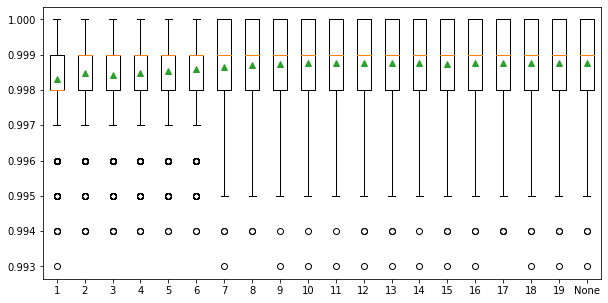

In [ ]:
# customize models with different tree depths
models = get_models_depth()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
     # evaluate models using k-fold cross-validation
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    # print the mean and standard deviation of models 
    # print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    print('>%s   Mean Score: %.6f (Score SD: %.6f)' % ('Tree Depth: ' + name, scores.mean(), scores.std()))
# display model performance 
plt.figure(figsize=(10,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()